In [141]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

DICCIONARIO_REGIONES = {1: 'EastEurope',
                        2: 'LatAm',
                        3: 'NorthAfrica',
                        4: 'SubSaharian',
                        5: 'WesternDem',
                        6: 'EastAsia',
                        7: 'SouthEastAsia',
                        8: 'SouthAsia',
                        9: 'Pacific',
                        10: 'Caribbean'}


In [136]:
def obtener_mitad_casos_df(df_largo):
    # Primero seria obtener el rango de indexes del df
    # Después sería obtener cuantos elementos se requieren
    # Después sería obtener la cantidad de elementos, pero sin repetirse
    cincuenta_porciento_casos = int(round(df_largo / 2, 0))
    indices_a_elegir = (random.sample(
        range(df_largo), cincuenta_porciento_casos))
    return indices_a_elegir


def obtener_submuestra(df):
    SEMILLA_PSEUDOALEATORIA = '0115'
    random.seed(SEMILLA_PSEUDOALEATORIA)

    columnas_a_utilizar = ['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc',
                           'imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']

    casos_a_obtener = obtener_mitad_casos_df(df.shape[0])
    df_cincuenta_casos = df.iloc[casos_a_obtener]
    df_cincuenta_columnas_a_utilizar = df_cincuenta_casos[columnas_a_utilizar]

    df_cincuenta_columnas_a_utilizar['ht_region'] = df_cincuenta_columnas_a_utilizar['ht_region'].replace(
        DICCIONARIO_REGIONES)

    return df_cincuenta_columnas_a_utilizar


def obtener_descripciones_variables(objeto):
    descripcion_variables_continuas = objeto.describe()
    print(descripcion_variables_continuas)

    variables_continuas = descripcion_variables_continuas.columns
    variables_discretas = set(objeto.columns) - set(variables_continuas)

    for variable_discreta in variables_discretas:
        print(objeto[variable_discreta].value_counts())


def observaciones_perdidas(dataframe, var, print_list=False):
    cantidad_lista_nan = dataframe[var].value_counts(dropna=False)
    porcentaje_lista_nan = dataframe[var].value_counts('%', dropna=False)

    if np.nan in cantidad_lista_nan.index:
        cantidad_nan = cantidad_lista_nan[np.nan]
        porcentaje_nan = porcentaje_lista_nan[np.nan]

    else:
        cantidad_nan = 0
        porcentaje_nan = 0

    if print_list:
        return cantidad_nan, porcentaje_nan, porcentaje_lista_nan

    else:
        return cantidad_nan, porcentaje_nan


In [137]:
# Con las siguientes lineas se obtuvo el diccionario que relaciona las regiones con sus codigos

# unidas = df_submuestra.merge(df_auxiliar, how='inner', on='ccodealp')
# DICCIONARIO_REGIONES = dict(unidas.groupby(by=['ht_region_x', 'ht_region_y']).sum().index)

In [138]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df_auxiliar = pd.read_csv('subsample_isz.csv')

In [139]:
df_submuestra = obtener_submuestra(df)
obtener_descripciones_variables(df_submuestra)

# La descripcion de las variables gle_cgdpc, undp_hdi e imf_pop se muestran en las columnas
# mostradas abajo

        undp_hdi      gle_cgdpc     imf_pop   wef_imort  who_alc2000  \
count  91.000000      96.000000   75.000000   77.000000    87.000000   
mean    0.693110   13141.156818   22.851093   24.360189     4.753908   
std     0.142295   17773.468801   39.279938   24.648970     3.864448   
min     0.421000     332.269990    0.012000    1.800000     0.000000   
25%     0.594000    2866.250000    1.292000    7.200000     1.355000   
50%     0.719000    6682.109850    6.880000   14.700000     3.780000   
75%     0.793000   16388.190000   27.767500   35.700001     8.080000   
max     0.938000  108481.130000  202.768997  117.400002    15.190000   

        who_tobt   wdi_exph  
count  61.000000  94.000000  
mean   23.875410   6.768343  
std     9.307822   2.713152  
min     7.000000   1.475303  
25%    16.200001   4.849392  
50%    23.799999   6.428007  
75%    30.299999   8.287694  
max    48.900002  17.135723  
BTN    1
NIC    1
HRV    1
FRA    1
BRB    1
      ..
EST    1
CPV    1
ESP    1


C:\Users\Javier\AppData\Local\Temp\ipykernel_3552\3639976632.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cincuenta_columnas_a_utilizar['ht_region'] = df_cincuenta_columnas_a_utilizar['ht_region'].replace(


In [140]:
for variable in df_submuestra.columns:
    observaciones_perdidas(df_submuestra, variable, True)

NaN      0.061856
0.637    0.030928
0.758    0.020619
0.775    0.020619
0.823    0.020619
           ...   
0.863    0.010309
0.646    0.010309
0.882    0.010309
0.479    0.010309
0.678    0.010309
Name: undp_hdi, Length: 83, dtype: float64
BTN    0.010309
NIC    0.010309
HRV    0.010309
FRA    0.010309
BRB    0.010309
         ...   
EST    0.010309
CPV    0.010309
ESP    0.010309
MEX    0.010309
SLV    0.010309
Name: ccodealp, Length: 97, dtype: float64
SubSaharian      0.237113
EastEurope       0.206186
NorthAfrica      0.134021
WesternDem       0.113402
LatAm            0.092784
Pacific          0.082474
Caribbean        0.041237
SouthAsia        0.030928
EastAsia         0.030928
SouthEastAsia    0.030928
Name: ht_region, dtype: float64
5639.02000     0.010309
2527.10010     0.010309
18020.41000    0.010309
34007.89800    0.010309
22888.97100    0.010309
                 ...   
19768.03900    0.010309
3972.61010     0.010309
31086.35000    0.010309
13609.42000    0.010309
332.2699

In [152]:
def graficar_histograma(sample_df, full_df, var, true_mean, sample_mean=False):
    plt.hist(sample_df[var])

    if sample_mean:
        plt.axvline(sample_df[var].mean(), color='yellow')
    
    if true_mean:
        plt.axvline(full_df[var].mean(), color='red')
    
    plt.show()

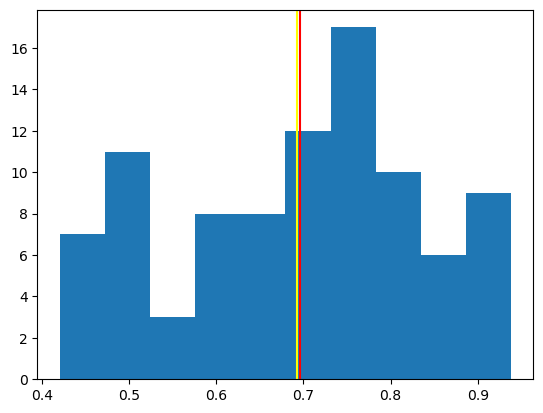

In [153]:
graficar_histograma(df_submuestra, df, 'undp_hdi', True, True)

In [150]:
df_submuestra

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
16,0.604,BTN,SouthAsia,5639.02000,0.766,35.700001,0.23,NaN,3.573015
118,0.637,NAM,SubSaharian,4521.29000,NaN,28.299999,7.84,23.799999,8.928688
60,0.470,DJI,SubSaharian,2685.50000,NaN,NaN,0.38,NaN,10.568256
37,NaN,TWN,EastAsia,33965.87100,23.434,3.934564,NaN,NaN,NaN
11,0.823,BHR,NorthAfrica,22498.48000,1.268,8.200000,1.57,30.299999,4.980796
...,...,...,...,...,...,...,...,...,...
176,0.723,TUN,NorthAfrica,6912.27980,NaN,13.800000,1.39,NaN,7.003858
89,NaN,PRK,EastAsia,1727.81990,NaN,NaN,3.35,NaN,NaN
114,0.804,MNE,EastEurope,14538.52000,0.622,5.500000,6.56,NaN,6.416543
75,0.919,ISL,WesternDem,31313.60900,0.329,1.800000,7.45,17.500000,8.859166
